In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/Users/tjwilli/jupyter.mplstyle")
from IPython.display import Video
import time

In [2]:
class Timer:
    def __init__(self):
        self.tstart = 0
        self.tstop = 0
    def start(self):
        self.tstart = time.time()
    def stop(self):
        self.tstop = time.time()
    def show(self):
        tdiff = self.tstop - self.tstart
        print("{:.2f} seconds elapsed".format(tdiff))

In [3]:
def psi_initial(x,x0,sigma,k=0):
    return (
        1/(np.pi)**.25/sigma**.5 *
        np.exp(
            -0.5 * (x-x0)**2 / sigma**2
        )
        *
        np.exp(1j*k*(x-x0))
    )

def get_C_matrix(V,dx,dt):
    #Get H matrix
    Hdiag = np.diag( -1j * (1/dx**2 + V),0 )
    offdiag_elems = np.ones_like(x)[:-1] * 1j / 2 / dx**2
    Hdiaglow = np.diag( offdiag_elems, k=-1 )
    Hdiaghi = np.diag( offdiag_elems, k=1 )
    Hoffdiag = Hdiaglow + Hdiaghi
    H = Hdiag + Hoffdiag
    #Get A and B
    iden = np.identity(x.size)
    A = iden - dt / 2 * H
    B = iden + dt / 2 * H
    #Get C
    Ainv = np.linalg.inv(A)
    C = np.matmul(Ainv,B)
    return C

def plot_time_evolution(psi_t,numplots=10):
    n = len(psi_t)
    step = int(n/numplots)
    iplotpsi = psi_t[::step]
    i = 0
    for ipsi in iplotpsi:
        plt.plot(x,np.real(np.conj(ipsi)*ipsi),label='t={:.2E}'.format(i*dt))
        i+=step
    plt.legend()

### Particle with non-zero potential

In [ ]:
def potential(x):
    return -1e5 * x

In [ ]:
plt.plot(x,potential(x))

In [ ]:
#Setup grid
x0 = 0
x1 = 1.5
t0 = 0
t1 = 2e-3
dx = 5e-4
dt = 1e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial

V = potential(x)
sigma = np.sqrt(0.005)
xmean = 0.3
psi0 = psi_initial(x,xmean,sigma)

In [ ]:
tstart = time.time()
C = get_C_matrix(V,dx,dt)
psi_t = []
psi_t.append( psi0 )
for itime in t:
    psi_t.append( np.dot(C,psi_t[-1]) )
tstop = time.time()
print("{:.2f} seconds".format(tstop-tstart))

In [ ]:
plot_time_evolution(psi_t)

In [ ]:
Video("animation/qm_downhill.mp4")

### Motion with constant velocity

# $\Psi_0(x,0)=\left(\frac{1}{\pi\sigma^2}\right)^{1/4}e^{-\frac{1}{2}\frac{\left(x-x_0\right)^2}{\sigma^2}}\rightarrow \left(\frac{1}{\pi\sigma^2}\right)^{1/4}e^{-\frac{1}{2}\frac{\left(x-x_0\right)^2}{\sigma^2}}e^{ik(x-x_0)}$

In [ ]:
def potential(x):
    return np.zeros_like(x)

In [ ]:
#Setup grid
x0 = 0
x1 = 1
t0 = 0
t1 = 2e-3
dx = 5e-4
dt = 1e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial

V = potential(x)
sigma = np.sqrt(0.005)
xmean = 0.3
psi0 = psi_initial(x,xmean,sigma,k=350)

In [ ]:
timer = Timer()
timer.start()
C = get_C_matrix(V,dx,dt)
psi_t = []
psi_t.append( psi0 )
for itime in t:
    psi_t.append( np.dot(C,psi_t[-1]) )
timer.stop()
timer.show()

In [ ]:
plot_time_evolution(psi_t)

In [ ]:
Video("animation/qm_constant_velocity.mp4")

### Particle "rolling uphill"

In [ ]:
def potential(x):
    x0 = 0.8
    sig = 0.4
    v = 1e5*np.exp(-(x-x0)**2/sig**2)
    return v

In [ ]:
plt.plot(x,potential(x))

In [ ]:
#Setup grid
x0 = 0
x1 = 1.5
t0 = 0
t1 = 2e-3
dx = 5e-4
dt = 1e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial

V = potential(x)
sigma = np.sqrt(0.005)
xmean = 0.3
psi0 = psi_initial(x,xmean,sigma,k=350)

In [ ]:
C = get_C_matrix(V,dx,dt)
psi_t = []
psi_t.append( psi0 )
for time in t:
    psi_t.append( np.dot(C,psi_t[-1]) )

In [ ]:
plot_time_evolution(psi_t)

In [ ]:
Video("animation/qm_uphill.mp4")

In [ ]:
Video("animation/qm_uphill_split.mp4")

### Tunnelling

#### Two ways of writing the same function

In [4]:
def potential(x,d,V0,x0=0.6):
    v = np.zeros_like(x)
    for i in range(x.size):
        if x[i] >= x0 and x[i] <= x0 + d:
            v[i] = V0
    return v

#A faster way
def potential(x,d,V0,x0=0.6):
    v = np.zeros_like(x)
    mask = (x>=x0) & (x<=x0+d)
    v[mask] = V0
    return v

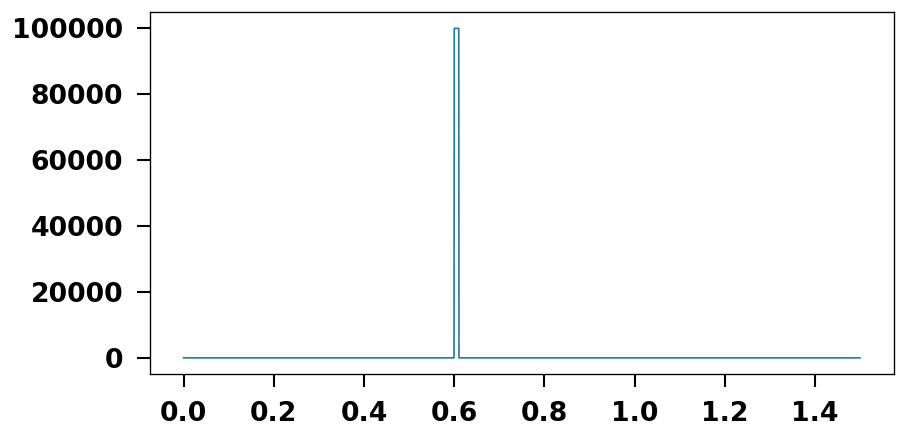

In [7]:
plt.plot(x,potential(x,0.01,1e5))

In [ ]:
Video("animation/qm_barrier_wide.mp4")

In [ ]:
Video("animation/qm_barrier_wider.mp4")

In [42]:
#Setup grid
x0 = 0
x1 = 1.5
t0 = 0
t1 = 2e-3
dx = 5e-4
dt = 1e-7
x = np.arange(x0,x1,dx)
t = np.arange(t0,t1,dt)

#Get V and psi initial
k = 350
# E = .5 * mv**2
# E = p**2/2m
# p = hbar * k
E = 0.5 * k**2
#V0 = 8e4
V0 = .5 * E
xloc = 0.6
d = 0.01
V = potential(x,d,V0,xloc)
sigma = 0.05#np.sqrt(0.005)
xmean = 0.3
psi0 = psi_initial(x,xmean,sigma,k=k)

In [43]:
timer = Timer()
timer.start()
C = get_C_matrix(V,dx,dt)
psi_t = []
psi_t.append( psi0 )
for itime in t:
    psi_t.append( np.dot(C,psi_t[-1]) )
timer.stop()
timer.show()

256.16 seconds elapsed


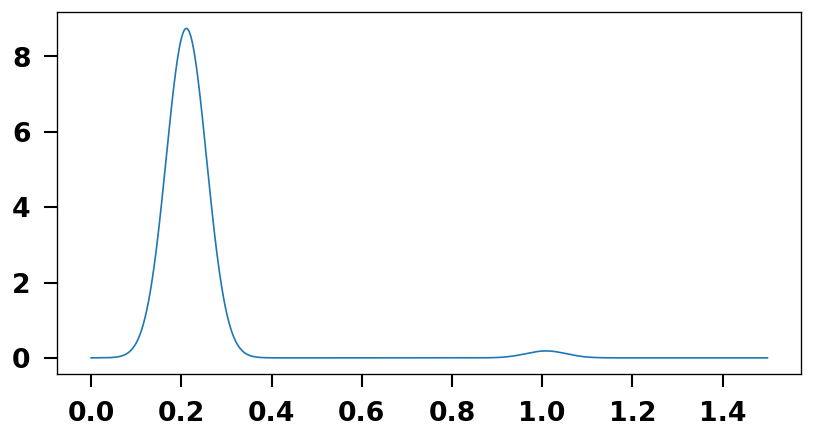

In [44]:
prob = np.real(np.conj(psi_t[-1])*psi_t[-1])
plt.plot(x,prob)

### Check normalization

In [37]:
totalprob = np.trapz(prob,x)
print(totalprob)

0.9999999965586783


#### Probability that particle ends up reflecting off of the barrier

In [45]:
xleft = []
pleft = []
for i in range(x.size):
    if x[i] < xloc:
        xleft.append(x[i])
        pleft.append(prob[i])

In [46]:
p_reflect = np.trapz(pleft,xleft)
print("{:.2f} probability of reflection".format(p_reflect))

0.98 probability of reflection


In [47]:
p_trans = np.trapz( prob[x>xloc+d],x[x>xloc+d] )
print("{:.2f} probability of transmission".format(p_trans))

0.02 probability of transmission


In [ ]:
#V=1e5, d=1e-2 (99% reflection)
#V=1e4, d=5e-3 (99% transmission)

In [ ]:
k

In [ ]:
def Tcoef(V0,d,E):
    denom = 1 + V0**2 / (4*E*(V0-E) ) * np.sinh( np.sqrt(2*d**2*(V0-E)) )**2
    return 1 / denom

In [ ]:
d = 0.005
k=350
E = 0.5 * k**2
vplot = np.linspace(1.000001,2,100)
t = Tcoef(vplot*E,d,E)

In [ ]:
plt.plot(vplot,t)